<a href="https://colab.research.google.com/github/domdicarlo/machine_learning_samples/blob/master/Machine_Learning_Sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This was a homework for a class called Machine Learning in Medicine at UChicago, where I had to learn how to use SKLearn and Keras to learn how to classify cells as cancerous or noncancerous (tumor or normal) based on their RNA sequencing data.

# Homework 2
## By Dominic DiCarlo

Sources consulted in writing this code:

https://www.digitalocean.com/community/tutorials/how-to-build-a-machine-learning-classifier-in-python-with-scikit-learn

Various documentations, and lots of stack overflow.

In [0]:
# Start with importing drive and the data
from google.colab import drive
drive.mount('/content/drive')



Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


## Part 1: Normal and Tumor Match Pair Analysis

### 1.a) Using SciKit Learn build a machine learning classifier that takes RNAseq profiles from matched normal tumor pairs and classifies the sample as Normal or Tumor. Compare the nt.coding.csv vs the nt.all.csv.


First, let's simply import the data.

In [0]:
# Import the data frame 

import pandas as pd

# The normal tumor coding data
# nt_coding = pd.read_csv("/content/drive/My Drive/MLiM-Datasets/HW2/nt.coding.csv")

# All of the normal tumor data
# nt_all = pd.read_csv("/content/drive/My Drive/MLiM-Datasets/HW2/nt.all.csv")

# Uncomment above later, debug using small sets

# The normal tumor coding data
nt_coding = pd.read_csv("/content/drive/My Drive/MLiM-Datasets/HW2/nt.coding.csv")

# All of the normal tumor data
nt_all = pd.read_csv("/content/drive/My Drive/MLiM-Datasets/HW2/nt.all.csv")


**As a quick observation, the coding data has about 1/3 the columns as the all data. The coding data might be only the relevant columns in determining tumor or non-tumor, as coding means *protein* coding**

Now, let's set up scikit-learn for our environment. 

We need to wrangle the dataframe somewhat to make it work with scikit-learn.

In [0]:
# Organize the data

# target labels for data, either 0 for normal
# or 1 for tumor

# cancer df with all cols except Type (aka, features)
# here 'axis = 1' means dropping by columns. to drop by rows,
# type 'axis = 0'
features_ntc = nt_coding.drop('Type', axis=1)

# the labels of the data
labels_ntc = nt_coding['Type'].to_numpy()
# the names of the different features, in this case input gene names
feature_names_ntc = nt_coding.columns
# the feature data
features_ntc = nt_coding.to_numpy()

print(features_ntc)

[[0.00000000e+00 1.50265481e+05 4.32784587e+03 ... 8.01630849e+04
  6.83730154e+03 2.00744219e+02]
 [0.00000000e+00 9.13228182e+05 2.32628469e+03 ... 5.54904160e+04
  7.42455814e+02 0.00000000e+00]
 [0.00000000e+00 3.59658935e+05 2.28971471e+05 ... 6.26771481e+04
  4.31990634e+03 0.00000000e+00]
 ...
 [0.00000000e+00 5.71780211e+05 0.00000000e+00 ... 4.38786858e+05
  1.94489970e+03 0.00000000e+00]
 [1.00000000e+00 2.33314351e+05 0.00000000e+00 ... 3.07254516e+04
  1.30123586e+04 0.00000000e+00]
 [1.00000000e+00 4.50226528e+05 2.41894075e+03 ... 9.89409523e+04
  7.73782481e+03 0.00000000e+00]]


Now that we have the data in a form usable by scikit-learn, let's split it into training and testing sets.

In [0]:
from sklearn.model_selection import train_test_split


# split data into testing and training
# test_size = 0.30 means 30% for testing and 70% for training
# this is a basic statistic 70/30 rule. 
# random state is simply a seed 
# this also default shuffles the data before splitting, which is important
# for this assignment (reportedly)
train_ntc, test_ntc, train_labels_ntc, test_labels_ntc = train_test_split(
                                                          features_ntc,
                                                          labels_ntc,
                                                          test_size=0.30, 
                                                          random_state=30)


I will use Support Vector Machine (sigmoid kernel), KMeans clustering, a decision tree, and Naive Bayes to get a good mix of classical machine learning methods of different types. 

In [0]:

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB


# initialize the classifiers, mostly using default parameters
# due to ignorance on what would be best
sigmoid_svm = SVC(kernel="sigmoid", gamma = "auto")
dtree = DecisionTreeClassifier()
kmeans = KMeans(n_clusters = 2)
gaussian_nb = GaussianNB()


In [0]:
# train the classifiers
model_sigmoid_svm = sigmoid_svm.fit(train_ntc, train_labels_ntc)
model_dtree = dtree.fit(train_ntc, train_labels_ntc)
model_kmeans = kmeans.fit(train_ntc, train_labels_ntc)
model_gaussian_nb = gaussian_nb.fit(train_ntc, train_labels_ntc)



In [0]:
# make predictions 

preds_sigmoid_svm = sigmoid_svm.predict(test_ntc)
preds_dtree = dtree.predict(test_ntc)
preds_kmeans = kmeans.predict(test_ntc)
preds_gaussian_nb = gaussian_nb.predict(test_ntc)


In [0]:
from sklearn.metrics import accuracy_score

# Get the accuracy scores 
print("SVM Sigmoid %", 100 * accuracy_score(test_labels_ntc, preds_sigmoid_svm))
print("Decision tree %", 100 * accuracy_score(test_labels_ntc, preds_dtree))
print("KMeans %", 100 * accuracy_score(test_labels_ntc, preds_kmeans))
print("Gaussian Naive Bayes %", 100 * accuracy_score(test_labels_ntc, preds_gaussian_nb))

SVM Sigmoid % 51.66666666666667
Decision tree % 100.0
KMeans % 45.666666666666664
Gaussian Naive Bayes % 95.0


**We see here that while two of our methods work fairly well (decision tree and Gaussian Naive Bayes), two perform pretty poorly at around the level of guessing (Scalar Vector Machine and KMeans). While I am unsure of exactly what is going on with SVM, for KMeans this isn't too unreasonable, since KMeans is computing means and the data is binary coded.**



Let's quickly perform the same calculations on the nt_all.csv data, to see if we get anything dramatically different.

In [0]:
# Organize the data

# target labels for data, either 0 for normal
# or 1 for tumor

# cancer df with all cols except Type (aka, features)
# here 'axis = 1' means dropping by columns. to drop by rows,
# type 'axis = 0'
features_nta = nt_all.drop('Type', axis=1)

# the labels of the data
labels_nta = nt_all['Type'].to_numpy()
# the names of the different features, in this case input gene names
feature_names_nta = nt_all.columns
# the feature data
features_nta = nt_all.to_numpy()


from sklearn.model_selection import train_test_split


# split data into testing and training
# test_size = 0.30 means 30% for testing and 70% for training
# this is a basic statistic 70/30 rule. 
# random state is simply a seed 
# this also default shuffles the data before splitting, which is important
# for this assignment (reportedly)
train_nta, test_nta, train_labels_nta, test_labels_nta = train_test_split(
                                                          features_nta,
                                                          labels_nta,
                                                          test_size=0.30, 
                                                          random_state=30)

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB


# initialize the classifiers, mostly using default parameters
# due to ignorance on what would be best
sigmoid_svm = SVC(kernel="sigmoid", gamma = "auto")
dtree = DecisionTreeClassifier()
kmeans = KMeans(n_clusters = 2)
gaussian_nb = GaussianNB()

# train the classifiers
model_sigmoid_svm = sigmoid_svm.fit(train_nta, train_labels_nta)
model_dtree = dtree.fit(train_nta, train_labels_nta)
model_kmeans = kmeans.fit(train_nta, train_labels_nta)
model_gaussian_nb = gaussian_nb.fit(train_nta, train_labels_nta)

# make predictions 

preds_sigmoid_svm = sigmoid_svm.predict(test_nta)
preds_dtree = dtree.predict(test_nta)
preds_kmeans = kmeans.predict(test_nta)
preds_gaussian_nb = gaussian_nb.predict(test_nta)

from sklearn.metrics import accuracy_score

# Get the accuracy scores 
print("SVM Sigmoid %", 100 * accuracy_score(test_labels_nta, preds_sigmoid_svm))
print("Decision tree %", 100 * accuracy_score(test_labels_nta, preds_dtree))
print("KMeans %", 100 * accuracy_score(test_labels_nta, preds_kmeans))
print("Gaussian Naive Bayes %", 100 * accuracy_score(test_labels_nta, preds_gaussian_nb))

SVM Sigmoid % 51.66666666666667
Decision tree % 100.0
KMeans % 45.666666666666664
Gaussian Naive Bayes % 86.33333333333333


We are getting very much the same performance, so let's just stick to the coding for computational speed for the rest of this data. This makes sense to, since the coding data stands for protein coding genes, which are the genes we will care most about in cell behavior (if not care only about), aka deciding cancerous or noncancerous. 

### 1.b) Model Selection

Let's amp up our model selection a bit more than this, and do KFold Cross Validation instead of a simple accuracy test with one split of the data. 

In [0]:
from sklearn.model_selection import KFold, cross_val_score 
# initialize the classifiers, mostly using default parameters
# due to ignorance on what would be best
sigmoid_svm = SVC(kernel="sigmoid", gamma = "auto")
dtree = DecisionTreeClassifier()
kmeans = KMeans(n_clusters = 2)
gaussian_nb = GaussianNB()

cross_val = KFold(5)

# For sigmoid svm
acc_sigmoid_svm = cross_val_score(sigmoid_svm, features_ntc, labels_ntc, cv=cross_val)
# For decision tree
acc_dtree = cross_val_score(dtree, features_ntc, labels_ntc, cv=cross_val)
# For KMeans
acc_kmeans = cross_val_score(kmeans, features_ntc, labels_ntc, cv=cross_val)
# For Gaussian Naive Bayes
acc_gaussian_nb = cross_val_score(gaussian_nb, features_ntc, labels_ntc, cv=cross_val)

print("Sigmoid SVM accuracy: ", acc_sigmoid_svm)
print("Decision tree accuracy: ", acc_dtree)
print("KMeans accuracy: ", acc_kmeans)
print("Gaussian Naive Bayes accuracy: ", acc_gaussian_nb)


Sigmoid SVM accuracy:  [0.52  0.49  0.52  0.48  0.515]
Decision tree accuracy:  [1. 1. 1. 1. 1.]
KMeans accuracy:  [-1.29370632e+20 -1.24611080e+20 -1.63783038e+20 -9.27141521e+19
 -1.18588730e+20]
Gaussian Naive Bayes accuracy:  [0.96  0.94  0.905 0.925 0.945]


**We see the KFold accuracy test gives us more or less the same values as a simple one train, one test set accuracy test. Decision tree performs remarkably well, which suggests there may be some key combination of genes that is always indicative of cancer, or at least in this set of data (it may be overtrained). Gaussian Naive Bayes is promising, while Sigmoid is no better than chance, and KMeans is doing something strange. Again, this is likely because we shouldn't use KMeans for binary data, the mean doesn't have the same significance it should have for a continuous data range.**

### 1.c) Feature Selection (P < 100)

Let's get into some feature selection now. Let's first try variance threshold, a good baseline method

In [0]:
from sklearn.feature_selection import VarianceThreshold

# create a variance threshold selector
variance_selector = VarianceThreshold(threshold=300000000000000)

print("Original number of features:", features_ntc.shape[1])

# fit the features to the selector
features_ntc_sel = variance_selector.fit_transform(features_ntc)

print("Variance selected features:", features_ntc_sel.shape[1])


Original number of features: 19562
Variance selected features: 96


**We see here it takes using a varance threshold of 300 trillion to trim the number of features down to less than 100. This data has very high variance! This indicates the data is very spread out, that any given gene can be expressed very differently by different cells. By selecting the ones with the highest variance, we are looking at the gene expressions that vary the most between cells (of which we might expect that cancerous cells and noncancerous cells are most different from each other!).**

Let's try using this reduced X to build a classifier. We will use Gaussian Naive Bayes because it is pretty good but not perfect like decision tree.

In [0]:
# For Gaussian Naive Bayes
gaussian_nb = GaussianNB()

# check the cross validation score for cv = KFold(5)
acc_gaussian_nb_sel = cross_val_score(gaussian_nb, features_ntc_sel, labels_ntc, cv=cross_val)

print("The Gaussian NB P ~20,000 data accuracy:", acc_gaussian_nb)
print("The Gaussian NB P<100 data accuracy:", acc_gaussian_nb_sel)

The Gaussian NB P ~20,000 data accuracy: [0.96  0.94  0.905 0.925 0.945]
The Gaussian NB P<100 data accuracy: [0.77  0.76  0.725 0.755 0.73 ]


**We see that P<100 is not quite as accurate, but still decent for a huge reduction in features (as in, better than chance).**

Let's try this for decision tree now.

In [0]:
# For decision tree
dtree = DecisionTreeClassifier()

# check the cross validation score for cv = KFold(5)
acc_dtree_sel = cross_val_score(dtree, features_ntc_sel, labels_ntc, cv=cross_val)

print("The Decision Tree  p~20,000 data accuracy:", acc_dtree)
print("The Decision Tree P<100 data accuracy:", acc_dtree_sel)

The Decision Tree  p~20,000 data accuracy: [1. 1. 1. 1. 1.]
The Decision Tree P<100 data accuracy: [0.9   0.845 0.765 0.855 0.835]


We see that the same feature selection works alright for Decision tree too.

Now let's try a different feature selector, using a Tree-based feature selection method. This might lend itself quite well to the fact that a decision tree is acting as a good classifier, perhaps there is some tree like thing going on with the important features.

In [0]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
import numpy as np

# This uses a tree model to predict the strongest indicators
# of the data
tree_class= ExtraTreesClassifier(n_estimators=50)

tree_class = tree_class.fit(features_ntc, labels_ntc)

# here we set an infinite threshold so that we can just take the best 99 features
model = SelectFromModel(tree_class, prefit=True, threshold=-np.inf, max_features=99)

# transform old features to new set
features_ntc_sel = model.transform(features_ntc)


First for Gaussian NB:

In [0]:

# for Gaussian
gaussian_nb = GaussianNB()

# check the cross validation score for cv = KFold(5)
acc_gaussian_nb_sel = cross_val_score(gaussian_nb, features_ntc_sel, labels_ntc, cv=cross_val)

print("The Gaussian NB P ~20,000 data accuracy:", acc_gaussian_nb)
print("The Gaussian NB P<100 data accuracy:", acc_gaussian_nb_sel)

The Gaussian NB P ~20,000 data accuracy: [0.96  0.94  0.905 0.925 0.945]
The Gaussian NB P<100 data accuracy: [0.88  0.885 0.87  0.905 0.86 ]


Then for Decision Tree:

In [0]:
# For decision tree
dtree = DecisionTreeClassifier()

# check the cross validation score for cv = KFold(5)
acc_dtree_sel = cross_val_score(dtree, features_ntc_sel, labels_ntc, cv=cross_val)

print("The Decision Tree  p~20,000 data accuracy:", acc_dtree)
print("The Decision Tree P<100 data accuracy:", acc_dtree_sel)

The Decision Tree  p~20,000 data accuracy: [1. 1. 1. 1. 1.]
The Decision Tree P<100 data accuracy: [1. 1. 1. 1. 1.]


**The Tree Based Feature selection method performs very well, supporting the idea that cancer is encoded in the gene expression in some tree-like pattern, where certain combinations of cancer genes indicate tumor/or non tumor.**

### 1.d) Keras Deep Learning Classifier

Now we need to do create a deep learning classifier that can perform the same task as before. As I was doing this, I discovered a (what should have been) fatal error I had made before (that slowed down my progress greatly :( ...). I didn't normalize the data for the classical methods earlier. So first I will have to do that.

In [0]:

from sklearn.preprocessing import MinMaxScaler

# scaler to normalize the data
scaler = MinMaxScaler()
# fit the normalizer
scaler.fit(features_ntc)
# use the normalizer
features_ntc = scaler.transform(features_ntc)


With that being properly done, we can prepare a neural network now using Keras.

In [0]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.optimizers import SGD, Adam
from sklearn.model_selection import train_test_split

# reevaluate this to bring it back into environment
train_ntc, test_ntc, train_labels_ntc, test_labels_ntc = train_test_split(
                                                          features_ntc,
                                                          labels_ntc,
                                                          test_size=0.30, 
                                                          random_state=30)

number_features = features_ntc.shape[1] # grab the number of columns 

# we put this into a function so we can use the KerasClassifier function on it
# which allows us to do KFold Cross validation using Sklearn...
# in the future could create some sort of simpler neural net maker function
# but pressed for time with this homework. 
def create_model1():
  # input layer followed by our 2 hidden layers and output
  input_layer = Input((number_features, ))
  hidden = Dense(8, activation = "relu")(input_layer) # each layer feeds into another
  hidden  = Dense(8, activation = "relu")(hidden)
  output_layer = Dense(1, activation="sigmoid")(hidden)


# create the model now
  deep_model = Model(input = input_layer, output = output_layer)

# compile with some parameters we will change
  deep_model.compile(optimizer = SGD(lr=0.01, clipnorm=1), loss = "mse",
                   metrics = ["accuracy"])
  
  return deep_model

deep_model = create_model1()
print(deep_model.summary())
# train model
history = deep_model.fit(train_ntc, train_labels_ntc, validation_data=(test_ntc, test_labels_ntc),
                         epochs=150, batch_size=100)



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


Model: "model_69"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_70 (InputLayer)        (None, 19562)             0         
_________________________________________________________________
dense_220 (Dense)            (None, 8)                 156504    
_________________________________________________________________
dense_221 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_222 (Dense)            (None, 1)                 9         
Total params: 156,585
Trainable params: 156,585
Non-trainable params: 0
_________________________________________________________________
None


Plotting the accuracy and loss functions now:

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


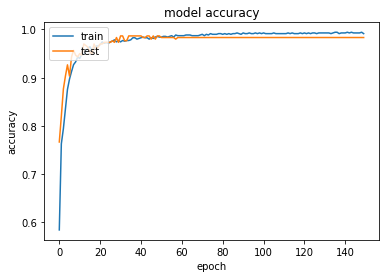

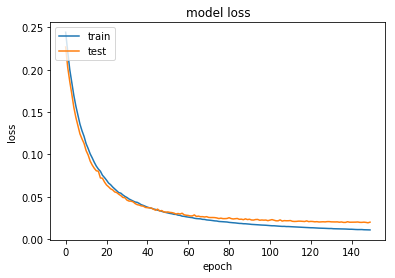

In [0]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**We see we get something quite nice now, where the learning curve bottoms out around 100 epochs of testing data. This took plenty of playing around with the parameters, choosing a good optimizer with a decent learning rate, as well as a good loss function. We changed the 1 and 0 data to a categorical value using sigmoid as our output.**

Perform KFold cross validation

In [0]:
from keras.wrappers.scikit_learn import KerasClassifier

# this wraps the network to put into sklearn,
# so we can use cross_val_score method for kfold
# cross validations
neural_network = KerasClassifier(build_fn=create_model1, 
                                 epochs=150, 
                                 batch_size=100)

cross_score = cross_val_score(neural_network, features_ntc, labels_ntc, cv=5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


Epoch 1/150
800/800 [==============================] - 2s 3ms/step - loss: 0.2462 - acc: 0.4975
Epoch 2/150
800/800 [==============================] - 0s 141us/step - loss: 0.2378 - acc: 0.5000
Epoch 3/150
800/800 [==============================] - 0s 144us/step - loss: 0.2300 - acc: 0.5000
Epoch 4/150
800/800 [==============================] - 0s 146us/step - loss: 0.2235 - acc: 0.5000
Epoch 5/150
800/800 [==============================] - 0s 148us/step - loss: 0.2180 - acc: 0.5000
Epoch 6/150
800/800 [==============================] - 0s 138us/step - loss: 0.2128 - acc: 0.5087
Epoch 7/150
800/800 [==============================] - 0s 147us/step - loss: 0.2085 - acc: 0.5150
Epoch 8/150
800/800 [==============================] - 0s 139us/step - loss: 0.2041 - acc: 0.5225
Epoch 9/150
800/800 [==============================] - 0s 136us/step - loss: 0.2005 - acc: 0.5687
Epoch 10/150
800/800 [==============================] - 0s 142us/step - loss: 0.1971 - acc: 0.6000
Epoch 11/150
800/800 

In [0]:
print(cross_score)

NameError: ignored

**The different folds perform similarly, and each well.**

## Part 2: Cancer Type Classifier for 18 Common Tumor Types

### 2.a) Using SciKit Learn build a machine learning classifier that classifies Cancer Type from the type.coding.csv and type.all.csv files.  Compare the coding vs all genes cases.

### 2.b) Using model selection methods of your choice, determine which classical ML method performs best.

We will do both of these at once.

Let's import the type csv

In [0]:
# Import the data frame 

import pandas as pd

# The normal tumor coding data
# nt_coding = pd.read_csv("/content/drive/My Drive/MLiM-Datasets/HW2/type.coding.csv")

# All of the normal tumor data
# nt_all = pd.read_csv("/content/drive/My Drive/MLiM-Datasets/HW2/type.all.csv")

# Uncomment above later, debug using small sets

# The normal tumor coding data
type_coding = pd.read_csv("/content/drive/My Drive/MLiM-Datasets/HW2/type.coding.csv")

# All of the normal tumor data
type_all = pd.read_csv("/content/drive/My Drive/MLiM-Datasets/HW2/type.all.csv")

Wrangle the data and normalize it (This time right away).

In [0]:
from sklearn.preprocessing import MinMaxScaler

# Organize the data


# target labels for data, either 0 for normal
# or 1 for tumor

# cancer df with all cols except Type (aka, features)
# here 'axis = 1' means dropping by columns. to drop by rows,
# type 'axis = 0'
features_tc = type_coding.drop('Type', axis=1)

# the labels of the data
labels_tc = type_coding['Type'].to_numpy()
# the names of the different features, in this case input gene names
feature_names_tc = type_coding.columns
# the feature data
features_tc = type_coding.to_numpy()


# normalize the data usign this function
scaler = MinMaxScaler()
# fit the normalizer to the data
scaler.fit(features_tc)
# transform the data based on the new scaler
features_tc = scaler.transform(features_tc)




Now that the data is normalized, we can go ahead and jump right in and do 2)a) and 2)b) right now as well and just run the data through the same classifiers used earlier.

In [0]:
from sklearn.model_selection import KFold, cross_val_score 
# initialize the classifiers, mostly using default parameters
# due to ignorance on what would be best
sigmoid_svm = SVC(kernel="sigmoid", gamma = "auto")
dtree = DecisionTreeClassifier()
kmeans = KMeans(n_clusters = 2)
gaussian_nb = GaussianNB()

cross_val = KFold(5)

# For sigmoid svm
acc_sigmoid_svm = cross_val_score(sigmoid_svm, features_tc, labels_tc, cv=cross_val)
# For decision tree
acc_dtree = cross_val_score(dtree, features_tc, labels_tc, cv=cross_val)
# For KMeans
acc_kmeans = cross_val_score(kmeans, features_tc, labels_tc, cv=cross_val)
# For Gaussian Naive Bayes
acc_gaussian_nb = cross_val_score(gaussian_nb, features_tc, labels_tc, cv=cross_val)

print("Sigmoid SVM accuracy: ", acc_sigmoid_svm)
print("Decision tree accuracy: ", acc_dtree)
print("KMeans accuracy: ", acc_kmeans)
print("Gaussian Naive Bayes accuracy: ", acc_gaussian_nb)


Sigmoid SVM accuracy:  [0.185 0.19  0.235 0.175 0.205]
Decision tree accuracy:  [0.935 0.97  0.985 0.98  0.98 ]
KMeans accuracy:  [-102939.98187166 -105851.3906881  -101859.38045618 -105326.81137902
 -108450.89267433]
Gaussian Naive Bayes accuracy:  [0.23  0.205 0.23  0.215 0.24 ]


**Not terrible (better than guessing (1/18), except of course for KMeans, which we see the strange accuracy measurement still appearing that appeared before, even now that the data is normalized. I have just learned now that this is because KMeans is clustering, but it is not a classification method if employed just like this. This is because it only returns distance from the mean rather than some actual predicted value. It should never have been used! We do see Decision tree performing quite well still, which is really interesting! I wonder if domain knowledge would point to this.**

Lets quickly apply this to the type_all.csv to see if we get any difference (again, like before).

In [0]:
from sklearn.preprocessing import MinMaxScaler

# Organize the data


# target labels for data, either 0 for normal
# or 1 for tumor

# cancer df with all cols except Type (aka, features)
# here 'axis = 1' means dropping by columns. to drop by rows,
# type 'axis = 0'
features_ta = type_all.drop('Type', axis=1)

# the labels of the data
labels_ta = type_all['Type'].to_numpy()
# the names of the different features, in this case input gene names
feature_names_ta = type_all.columns
# the feature data
features_ta = type_all.to_numpy()


# normalize the data usign this function
scaler = MinMaxScaler()
# fit the normalizer to the data
scaler.fit(features_ta)
# transform the data based on the new scaler
features_ta = scaler.transform(features_ta)




from sklearn.model_selection import KFold, cross_val_score 
# initialize the classifiers, mostly using default parameters
# due to ignorance on what would be best
sigmoid_svm = SVC(kernel="sigmoid", gamma = "auto")
dtree = DecisionTreeClassifier()
kmeans = KMeans(n_clusters = 2)
gaussian_nb = GaussianNB()

cross_val = KFold(5)

# For sigmoid svm
acc_sigmoid_svm = cross_val_score(sigmoid_svm, features_ta, labels_ta, cv=cross_val)
# For decision tree
acc_dtree = cross_val_score(dtree, features_ta, labels_ta, cv=cross_val)
# For KMeans
acc_kmeans = cross_val_score(kmeans, features_ta, labels_ta, cv=cross_val)
# For Gaussian Naive Bayes
acc_gaussian_nb = cross_val_score(gaussian_nb, features_ta, labels_ta, cv=cross_val)

print("Sigmoid SVM accuracy: ", acc_sigmoid_svm)
print("Decision tree accuracy: ", acc_dtree)
print("KMeans accuracy: ", acc_kmeans)
print("Gaussian Naive Bayes accuracy: ", acc_gaussian_nb)


Sigmoid SVM accuracy:  [0.235 0.17  0.255 0.205 0.215]
Decision tree accuracy:  [0.96  0.97  0.965 0.97  0.965]
KMeans accuracy:  [-508076.75749404 -520855.65223671 -515192.61005143 -514324.31919128
 -546008.63823215]
Gaussian Naive Bayes accuracy:  [0.035 0.035 0.08  0.06  0.115]


We get more or less the same results (aside from much poorer Gaussian NB; perhaps it can't handle too many vars?) --> so let's just use the coding data.

### 2.c) Using feature selection methods of your choice, determine a < 100 gene signature that can be used to classify tumor type.

Let's try the same methods employed before so we can see if using them on normalized data or for the 18 types is any more interesting.

First let's apply Variance Threshold to Decision Tree and Gaussian Naive Bayes

In [0]:
from sklearn.feature_selection import VarianceThreshold

# create a variance threshold selector
variance_selector = VarianceThreshold(threshold=0.118)

print("Original number of features:", features_tc.shape[1])

# fit the features to the selector
features_tc_sel = variance_selector.fit_transform(features_tc)

print("Variance selected features:", features_tc_sel.shape[1])


Original number of features: 19562
Variance selected features: 99


Suddenly we need a much smaler variance threshold! This must be because now the data is normalized, whereas before the data was all over the place so it only made sense to have such an astronomical variance (in the trillions).

In [0]:
# For Gaussian Naive Bayes
gaussian_nb = GaussianNB()

# check the cross validation score for cv = KFold(5)
acc_gaussian_nb_sel = cross_val_score(gaussian_nb, features_tc_sel, labels_tc, cv=cross_val)

print("The Gaussian NB P ~20,000 data accuracy:", acc_gaussian_nb)
print("The Gaussian NB P<100 data accuracy:", acc_gaussian_nb_sel)

The Gaussian NB P ~20,000 data accuracy: [0.035 0.035 0.08  0.06  0.115]
The Gaussian NB P<100 data accuracy: [0.675 0.69  0.71  0.79  0.665]


In [0]:
# For decision tree
dtree = DecisionTreeClassifier()

# check the cross validation score for cv = KFold(5)
acc_dtree_sel = cross_val_score(dtree, features_tc_sel, labels_tc, cv=cross_val)

print("The Decision Tree  p~20,000 data accuracy:", acc_dtree)
print("The Decision Tree P<100 data accuracy:", acc_dtree_sel)

The Decision Tree  p~20,000 data accuracy: [0.96  0.97  0.965 0.97  0.965]
The Decision Tree P<100 data accuracy: [0.565 0.535 0.475 0.515 0.565]


**Very interesting result. We see that Gaussian works much better with a smaller subset of data (lending support to my idea it works better with less variables to account for, will have to look into this sometime), and that the decision tree predictive ability falls off with P<100, though still okay.**

Now let's apply the ExtraTreesClassifier to the same two classifiers.

In [0]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
import numpy as np

# This uses a tree model to predict the strongest indicators
# of the data
tree_class= ExtraTreesClassifier(n_estimators=50)

tree_class = tree_class.fit(features_tc, labels_tc)

# here we set an infinite threshold so that we can just take the best 99 features
model = SelectFromModel(tree_class, prefit=True, threshold=-np.inf, max_features=99)

# transform old features to new set
features_tc_sel = model.transform(features_tc)


In [0]:
# for Gaussian
gaussian_nb = GaussianNB()

# check the cross validation score for cv = KFold(5)
acc_gaussian_nb_sel = cross_val_score(gaussian_nb, features_tc_sel, labels_tc, cv=cross_val)

print("The Gaussian NB P ~20,000 data accuracy:", acc_gaussian_nb)
print("The Gaussian NB P<100 data accuracy:", acc_gaussian_nb_sel)

The Gaussian NB P ~20,000 data accuracy: [0.23  0.205 0.23  0.215 0.24 ]
The Gaussian NB P<100 data accuracy: [0.995 0.985 0.98  0.99  0.99 ]


In [0]:
# For decision tree
dtree = DecisionTreeClassifier()

# check the cross validation score for cv = KFold(5)
acc_dtree_sel = cross_val_score(dtree, features_tc_sel, labels_tc, cv=cross_val)

print("The Decision Tree  p~20,000 data accuracy:", acc_dtree)
print("The Decision Tree P<100 data accuracy:", acc_dtree_sel)

The Decision Tree  p~20,000 data accuracy: [0.935 0.97  0.985 0.98  0.98 ]
The Decision Tree P<100 data accuracy: [0.975 0.965 0.98  0.985 0.98 ]


**This tree method of variable selection is a rock star, bringing Gaussian NB and Decision tree to awesome predictive levels.**

### 2.d) Using Keras, build a deep learning classifier that performs the same classification task, and determine the learning curve (relationship of number of training samples to prediction accuracy) for your network.

In [0]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.optimizers import SGD, Adam
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# one hot encode labels_tc to categorical

# reevaluate this to bring it back into environment
train_tc, test_tc, train_labels_tc, test_labels_tc = train_test_split(
                                                          features_tc,
                                                          labels_tc,
                                                          test_size=0.30, 
                                                          random_state=30)

# we need to code the variables to work with our network.
# this is called one hot encoding. in essence it needs a column for 
# each possible value, and then only one is set to 1. thus onehot

# integer encode
label_encoder = LabelEncoder()
integer_encoded_train_tc = label_encoder.fit_transform(train_labels_tc)

label_encoder = LabelEncoder()
integer_encoded_test_tc = label_encoder.fit_transform(test_labels_tc)

# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded_train_tc = integer_encoded_train_tc.reshape(len(integer_encoded_train_tc), 1)
onehot_encoded_train_tc = onehot_encoder.fit_transform(integer_encoded_train_tc)

onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded_test_tc = integer_encoded_test_tc.reshape(len(integer_encoded_test_tc), 1)
onehot_encoded_test_tc = onehot_encoder.fit_transform(integer_encoded_test_tc)



/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a Lab

In [0]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.optimizers import SGD, Adam
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical



number_features = features_tc.shape[1] # grab the number of columns 

def create_model2():
  # input layer followed by our 2 hidden layers and output
  input_layer = Input((number_features, ))
  hidden = Dense(160, activation = "relu")(input_layer) # each layer feeds into another
  hidden  = Dense(120, activation = "relu")(hidden)
  hidden  = Dense(80, activation = "relu")(hidden)
  hidden  = Dense(36, activation = "relu")(hidden)
  output_layer = Dense(18)(hidden)


# create the model now
  deep_model = Model(input = input_layer, output = output_layer)

# compile with some parameters we will change
  deep_model.compile(optimizer = SGD(lr=0.01, clipnorm=1), loss = "mse",
                   metrics = ["accuracy"])
  
  return deep_model

deep_model = create_model2()

# train model
history = deep_model.fit(train_tc, onehot_encoded_train_tc, validation_data=(test_tc, onehot_encoded_test_tc),
                         epochs=400, batch_size=100)


Model: "model_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_37 (InputLayer)        (None, 19562)             0         
_________________________________________________________________
dense_135 (Dense)            (None, 160)               3130080   
_________________________________________________________________
dense_136 (Dense)            (None, 120)               19320     
_________________________________________________________________
dense_137 (Dense)            (None, 80)                9680      
_________________________________________________________________
dense_138 (Dense)            (None, 36)                2916      
_________________________________________________________________
dense_139 (Dense)            (None, 18)                666       
Total params: 3,162,662
Trainable params: 3,162,662
Non-trainable params: 0
________________________________________________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


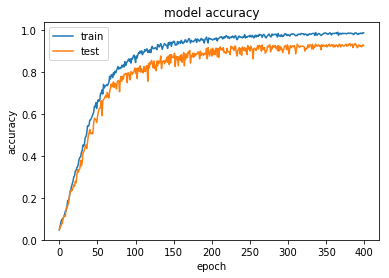

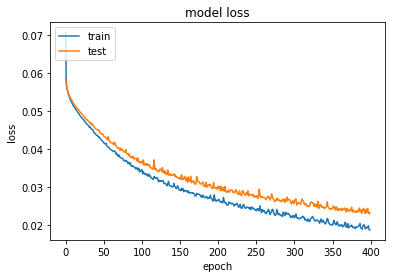

In [0]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**We see that the model does okay. It's loss keeps lowering but the accuracy bottoms out. It thus gets more confident but not more accurate. Accuracy bottoms out around 200 epochs.**

Perform KFold cross validation 

In [0]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score 


# this wraps the network to put into sklearn,
# so we can use cross_val_score method for kfold
# cross validations
neural_network = KerasClassifier(build_fn=create_model2, 
                                 epochs=400, 
                                 batch_size=100)

# one hot encode labels_tc
# integer encode
label_encoder = LabelEncoder()
integer_encoded_tc = label_encoder.fit_transform(labels_tc)

# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded_tc = integer_encoded_tc.reshape(len(integer_encoded_tc), 1)
onehot_encoded_tc = onehot_encoder.fit_transform(integer_encoded_tc)

cross_score = cross_val_score(neural_network, features_tc, onehot_encoded_tc, cv=5)



/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


Epoch 1/400
800/800 [==============================] - 1s 2ms/step - loss: 0.0758 - acc: 0.0525
Epoch 2/400
800/800 [==============================] - 0s 160us/step - loss: 0.0577 - acc: 0.0725
Epoch 3/400
800/800 [==============================] - 0s 160us/step - loss: 0.0552 - acc: 0.0962
Epoch 4/400
800/800 [==============================] - 0s 170us/step - loss: 0.0542 - acc: 0.1113
Epoch 5/400
800/800 [==============================] - 0s 170us/step - loss: 0.0531 - acc: 0.1225
Epoch 6/400
800/800 [==============================] - 0s 190us/step - loss: 0.0522 - acc: 0.1500
Epoch 7/400
800/800 [==============================] - 0s 165us/step - loss: 0.0516 - acc: 0.1925
Epoch 8/400
800/800 [==============================] - 0s 170us/step - loss: 0.0510 - acc: 0.2000
Epoch 9/400
800/800 [==============================] - 0s 167us/step - loss: 0.0505 - acc: 0.2300
Epoch 10/400
800/800 [==============================] - 0s 181us/step - loss: 0.0501 - acc: 0.2437
Epoch 11/400
800/800 

In [0]:
print(cross_score)

[0.91       0.88000003 0.91500002 0.92500001 0.95000002]


**We see that the different runs perform similarly.**